# Implementação: *Multiplayer Perceptron* - XOR

**INSTITUTO FEDERAL DE MINAS GERAIS**

*Departamento de Engenharia e Computação*   

*Professor: Ciniro Nametala Leite*

*Aluno: Luan Carlos dos Santos*

Multiplayer Perceptron aplicada ao problema XOR

---
### Pacotes necessários

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Funções de Ativação

In [86]:
# secante hiperbolica ao quadrado(inversa da tangente hiperbolica)
def sech(u):
   return 1 / np.cosh(u)**2

### Gerando o DataSet

In [87]:
x = np.array([
   [0,0],
   [0,1],
   [1,0],
   [1,1]
]) # corresponde as entradas i2 e i3 (x1, x2)

y = np.array([
   [-1,1],
   [1,-1],
   [1,-1],
   [-1,1]
])# corresponde as saidas i9 e i10 (y1 e y2)


### Bias

In [88]:
# criar o bias
i1 = 1 
i4 = i1
i5 = i4
i8 = i5

In [89]:
# inicializando os pesos da matriz wij
w61 = np.random.uniform() - 0.5
w62 = np.random.uniform() - 0.5
w63 = np.random.uniform() - 0.5

w72 = np.random.uniform() - 0.5
w73 = np.random.uniform() - 0.5
w74 = np.random.uniform() - 0.5

w95 = np.random.uniform() - 0.5
w96 = np.random.uniform() - 0.5
w97 = np.random.uniform() - 0.5

w106 = np.random.uniform() - 0.5
w107 = np.random.uniform() - 0.5
w108 = np.random.uniform() - 0.5

### Definição de parâmetros

In [90]:
contador_epocas = 0
tol = 0
erro_epoca_atual = tol + 1
n_amostras = 4
max_epocas = 10000
eta = 0.01 
erro_epocas = np.zeros(max_epocas)

### Treinamento da MLP

In [91]:
while (contador_epocas < max_epocas) and (erro_epoca_atual > tol):
   #exibe o progresso a cada 10 épocas
   if contador_epocas % 10 == 0:
      print(f'Epoca {contador_epocas}')
      # print(f'PIRU')
      
   # reseta o erro acumulado da epoca
   erro = 0
   #embaralha indices para apresentação aleatória das amostras
   indices_embaralhados = np.random.permutation(n_amostras)
   for i in range(n_amostras):
      #seleciona o indice no pool
      indice_selecionado = indices_embaralhados[i]
      
      #obter o conjunto de entrada x e sua respectiva saída y
      x_atual = x[indice_selecionado]
      y_atual = y[indice_selecionado]
      
      #separando componentes da entrada
      i2 = x_atual[0]
      i3 = x_atual[1]

      #separando a saida
      y9 = y_atual[0]
      y10 = y_atual[1]
      
      # FASE FORWARD
      #calcula ativacao do neuronio 1 da camada 1
      u6 = i1 * w61 + i2 * w62 + i3 * w63
      i6 = np.tanh(u6)
      
      #calcula ativacao do neuronio 2 da camada 1
      u7 = i2 * w72 + i3 * w73  + i4 * w74 
      i7 = np.tanh(u7)
      
      #calcula ativacao do neuronio 1 da camada 2
      u9 = i5 * w95 + i6 * w96 + i7 * w97
      i9 = np.tanh(u9)
      
      #calcula ativacao do neuronio 2 da camada 2
      u10 = i6 + w106 + i7 * w107 + i8 * w108
      i10 = np.tanh(u10)
      
      # FASE BACKPROPAGATION
      # calculos dos erros na saida
      e9 = y9 - i9
      e10 = y10 - i10
      
      # atualização de pesos da camada 2
      # pesos ligados ao neuronio 1 da camada 2
      
      #calcula o gradiente do neuronio 1 da camada 2
      deltinha9 = e9 * sech(u9)
      
      #calcula os ajustes dos pesos do neuronio 1 da camada 2
      deltaw95 = eta * deltinha9 * i5
      deltaw96 = eta * deltinha9 * i6
      deltaw97 = eta * deltinha9 * i7
      
      # atualizacao dos pesos ligados ao neuronio 1 da camada 2
      w95 += deltaw95
      w96 += deltaw96
      w97 += deltaw97
      
      #calcula o gradiente do neuronio 2 da camada 2
      deltinha10 = e10 * sech(u10)
      
      #calcula os ajustes dos pesos do neuronio 2 da camada 2
      deltaw106 = eta * deltinha10 * i6
      deltaw107 = eta * deltinha10 * i7
      deltaw108 = eta * deltinha10 * i8
      
      # atualizacao dos pesos ligados ao neuronio 2 da camada 2
      w106 += deltaw106
      w107 += deltaw107
      w108 += deltaw108 
      
      #neuronio 1 da camada 1
      #pesos ligados ao neuronio 1 da camada 1
      #calcula o gradiente do neuronio 1 da camada 1
      deltinha6 = sech(u6) * ((deltinha9*w96)+(deltinha10*w106))
      
      #calcula os ajustes dos pesos do neuronio 1 da camada 1
      deltaw61 = eta * deltinha6 * i1 
      deltaw62 = eta * deltinha6 * i2 
      deltaw63 = eta * deltinha6 * i3 
      
      #atualiza os pesos do neuronio 1 da camada 1
      w61 += deltaw61
      w62 += deltaw62
      w63 += deltaw63
      
      #neuronio 2 da camada 1
      #pesos ligados ao neuronio 2 da camada 1
      #calcula o gradiente do neuronio 2 da camada 1
      
      deltinha7 = sech(u7) * ((deltinha9*w97)+(deltinha10*w107))
      
      #calcula os ajustes dos pesos do neuronio 2 da camada 1
      deltaw72 = eta * deltinha7 *i2
      deltaw73 = eta * deltinha7 *i3 
      deltaw74 = eta * deltinha7 *i4 
      
      #atualiza os pesos do neuronio 2 da camada 1
      w72 += deltaw72
      w73 += deltaw73
      w74 += deltaw74
      
      
      #CALCULA O ERRO ACUMULADO 
      erro +=  np.power(e9, 2) + np.power(e10, 2)

   # incrementa o contador de épocas
   contador_epocas += 1
   
   #calcula o erro medio da epoca
   erro_epoca_atual = erro / n_amostras

   #armazena no historico de erros
   erro_epocas[contador_epocas - 1] = erro_epoca_atual
   
   

Epoca 0
Epoca 10
Epoca 20
Epoca 30
Epoca 40
Epoca 50
Epoca 60
Epoca 70
Epoca 80
Epoca 90
Epoca 100
Epoca 110
Epoca 120
Epoca 130
Epoca 140
Epoca 150
Epoca 160
Epoca 170
Epoca 180
Epoca 190
Epoca 200
Epoca 210
Epoca 220
Epoca 230
Epoca 240
Epoca 250
Epoca 260
Epoca 270
Epoca 280
Epoca 290
Epoca 300
Epoca 310
Epoca 320
Epoca 330
Epoca 340
Epoca 350
Epoca 360
Epoca 370
Epoca 380
Epoca 390
Epoca 400
Epoca 410
Epoca 420
Epoca 430
Epoca 440
Epoca 450
Epoca 460
Epoca 470
Epoca 480
Epoca 490
Epoca 500
Epoca 510
Epoca 520
Epoca 530
Epoca 540
Epoca 550
Epoca 560
Epoca 570
Epoca 580
Epoca 590
Epoca 600
Epoca 610
Epoca 620
Epoca 630
Epoca 640
Epoca 650
Epoca 660
Epoca 670
Epoca 680
Epoca 690
Epoca 700
Epoca 710
Epoca 720
Epoca 730
Epoca 740
Epoca 750
Epoca 760
Epoca 770
Epoca 780
Epoca 790
Epoca 800
Epoca 810
Epoca 820
Epoca 830
Epoca 840
Epoca 850
Epoca 860
Epoca 870
Epoca 880
Epoca 890
Epoca 900
Epoca 910
Epoca 920
Epoca 930
Epoca 940
Epoca 950
Epoca 960
Epoca 970
Epoca 980
Epoca 990
Epoca 1000


### Análise de Convergência

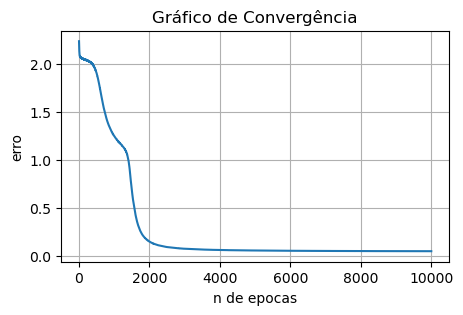

In [92]:
#grafico de convergencia
plt.figure(figsize=(5, 3))
plt.plot(range(contador_epocas), erro_epocas[:contador_epocas])
plt.title('Gráfico de Convergência')
plt.xlabel('n de epocas')
plt.ylabel('erro')
plt.grid(True)
plt.show()